### Import Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
# Upload the dataset
df= pd.read_csv("D:\\customer_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Find the Shape
df.shape

(2240, 29)

In [4]:
# Description of the Dataset
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [21]:
# Find the Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,4,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,4,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,5,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,5,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,3,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [67]:
R= df.sample(frac= 0.1)
print(R)

         ID  Year_Birth   Education  Marital_Status   Income  Kidhome  \
1469   4406        1970  Graduation               5  67419.0        0   
216    7264        1978    2n Cycle               4  52195.0        2   
1515   2853        1980  Graduation               4  51766.0        1   
266    1225        1963  Graduation               3  80124.0        0   
1351   5080        1993  Graduation               4  70515.0        0   
...     ...         ...         ...             ...      ...      ...   
1806   6237        1966         PhD               4   7144.0        0   
1028  10175        1958         PhD               2  32173.0        0   
696    8315        1995  Graduation               4  34824.0        0   
1179   5735        1991      Master               4  90638.0        0   
2200   7620        1990       Basic               4  16185.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
1469         1    16/01/13       29       846  ...

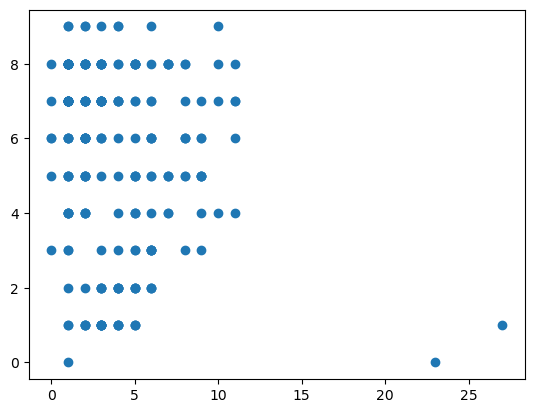

In [91]:
# Scatter plot 
plt.scatter(R['NumWebPurchases'], R['NumWebVisitsMonth'])
plt.show()

In [92]:
X = R.iloc[:,[16,19]].values
X.shape

(224, 2)

In [93]:
Clustering_score= []

for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init = 'random', random_state=42)
    kmeans.fit(X)
    Clustering_score.append(kmeans.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


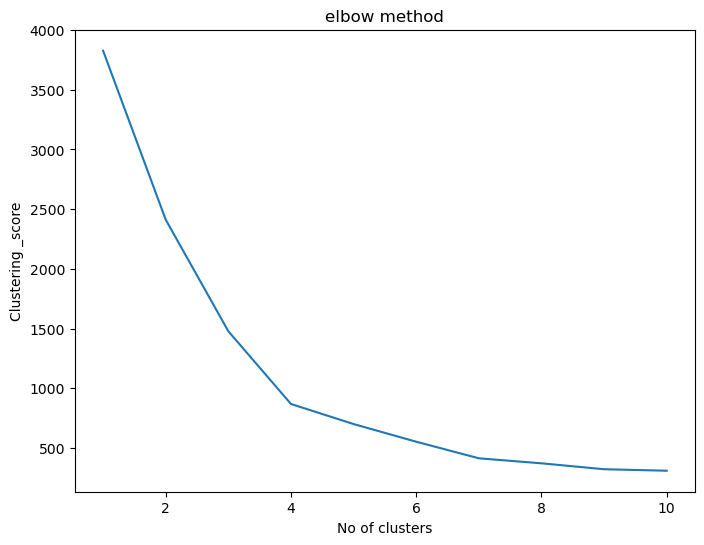

In [94]:
# create elbow for find how many cluster we have
plt.figure(figsize = (8,6))
plt.plot(range(1,11), Clustering_score)
plt.xlabel('No of clusters')
plt.ylabel('Clustering _score')
plt.title("elbow method")
plt.show()

In [95]:
# Find Clustering_Score
Clustering_score

[3827.0267857142862,
 2412.001680848829,
 1477.8262591256428,
 868.8733016124768,
 700.9578043907313,
 552.916925804828,
 414.11758723732396,
 372.1021475060474,
 322.6175940391149,
 310.09842773898504]

In [101]:
Clustering_score[3]

868.8733016124768

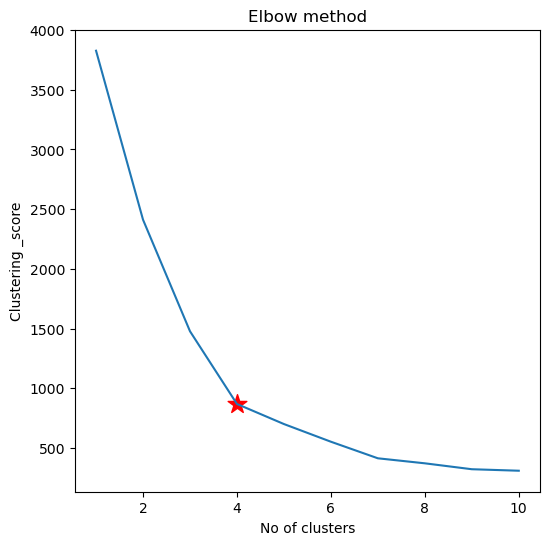

In [103]:
plt.figure(figsize = (6,6))
plt.plot(range(1,11), Clustering_score)
plt.scatter(4, Clustering_score[3], s= 200, c='red', marker='*')
plt.xlabel('No of clusters')
plt.ylabel('Clustering _score')
plt.title("Elbow method")
plt.show()

In [104]:
from sklearn.metrics import silhouette_score

silhouette_score_lst= []


for i in range (2,11):
    silhouette_score_lst.append(silhouette_score(X,(KMeans(n_clusters=i).fit_predict(X))))

In [105]:
print(silhouette_score_lst)

[0.41559815492509106, 0.47463857889704186, 0.4911921071008035, 0.4437536418748661, 0.4250932935585357, 0.42590439919761486, 0.41801507206637617, 0.4006124005594317, 0.40477276144392454]


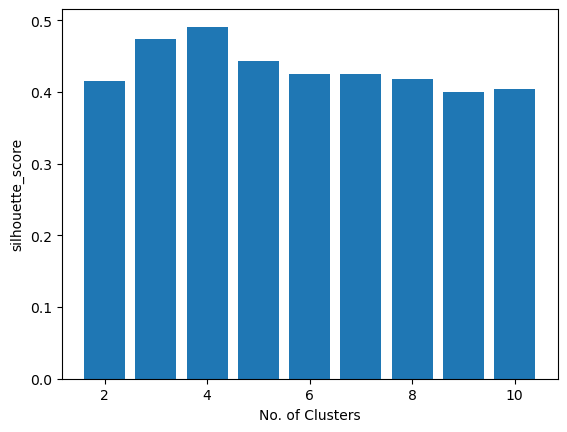

In [106]:
#plotting
k=[2,3,4,5,6,7,8,9,10]

plt.bar(k,silhouette_score_lst)
plt.xlabel('No. of Clusters')
plt.ylabel('silhouette_score')
plt.show()

### 

1-highest value of bar from given clusters values will be selected

2-selecting number of clusters = 4

In [107]:
#set up a model
kmeans= KMeans(n_clusters=4, random_state=42)

#fit the model
kmeans.fit(X)

pred= kmeans.predict(X)
print(pred)

[1 0 0 3 3 3 0 3 3 1 0 3 0 1 1 3 0 1 0 0 0 0 3 0 1 1 1 1 1 0 1 3 1 0 0 3 1
 0 0 0 0 3 3 0 1 0 3 1 0 0 0 0 0 0 0 0 3 3 1 0 0 3 3 3 0 1 0 1 3 1 0 1 3 3
 0 0 0 0 3 1 0 0 0 1 0 0 0 3 0 3 3 3 3 3 0 0 3 1 0 0 3 0 3 0 0 3 0 0 0 1 3
 3 0 0 3 1 1 3 0 0 1 1 1 0 1 1 3 0 0 0 0 0 1 0 3 1 0 0 3 3 3 3 1 0 0 0 0 0
 0 1 3 3 0 3 1 0 0 3 0 0 0 1 3 1 0 0 1 0 0 3 1 1 3 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 3 0 1 0 3 0 1 0 3 1 0 0 1 3 3 1 3 0 3 3 1 0 3 3 0 0 3 3 2 0 3 1 2 3 0
 3 0]


In [108]:
df['Cluster']= pd.DataFrame(pred, columns= ['cluster'])
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
0,5524,1957,Graduation,4,58138.0,0,0,04/09/12,58,635,...,0,0,0,0,0,0,3,11,1,1.0
1,2174,1954,Graduation,4,46344.0,1,1,08/03/14,38,11,...,0,0,0,0,0,0,3,11,0,0.0
2,4141,1965,Graduation,5,71613.0,0,0,21/08/13,26,426,...,0,0,0,0,0,0,3,11,0,0.0
3,6182,1984,Graduation,5,26646.0,1,0,10/02/14,26,11,...,0,0,0,0,0,0,3,11,0,3.0
4,5324,1981,PhD,3,58293.0,1,0,19/01/14,94,173,...,0,0,0,0,0,0,3,11,0,3.0
5,7446,1967,Master,5,62513.0,0,1,09/09/13,16,520,...,0,0,0,0,0,0,3,11,0,3.0
6,965,1971,Graduation,2,55635.0,0,1,13/11/12,34,235,...,0,0,0,0,0,0,3,11,0,0.0
7,6177,1985,PhD,3,33454.0,1,0,08/05/13,32,76,...,0,0,0,0,0,0,3,11,0,3.0
8,4855,1974,PhD,5,30351.0,1,0,06/06/13,19,14,...,0,0,0,0,0,0,3,11,1,3.0
9,5899,1950,PhD,5,5648.0,1,1,13/03/14,68,28,...,1,0,0,0,0,0,3,11,0,1.0


In [109]:
# Counts value in Cluster columns
df['Cluster'].value_counts()

0.0    106
3.0     64
1.0     52
2.0      2
Name: Cluster, dtype: int64

In [110]:
#centroid of each clusters

kmeans.cluster_centers_

array([[ 2.20754717,  7.05660377],
       [ 7.73076923,  5.96153846],
       [25.        ,  0.5       ],
       [ 3.390625  ,  2.25      ]])

In [113]:
kmeans.cluster_centers_[:,0]

array([ 2.20754717,  7.73076923, 25.        ,  3.390625  ])

In [112]:
X[pred == 0,0]

array([1, 4, 4, 3, 2, 2, 1, 2, 1, 2, 1, 3, 4, 3, 1, 1, 5, 2, 0, 1, 1, 5,
       1, 3, 3, 2, 1, 4, 2, 1, 3, 1, 1, 3, 3, 4, 2, 4, 2, 2, 1, 1, 2, 3,
       3, 2, 3, 0, 2, 3, 3, 2, 1, 2, 3, 2, 1, 3, 3, 2, 4, 1, 5, 2, 4, 1,
       1, 0, 5, 1, 1, 3, 1, 2, 2, 0, 5, 5, 2, 1, 5, 2, 0, 3, 3, 1, 5, 4,
       2, 2, 2, 1, 1, 2, 3, 2, 1, 1, 3, 2, 1, 1, 4, 1, 1, 2], dtype=int64)

In [114]:
X[pred == 0,1]

array([8, 5, 7, 7, 6, 7, 7, 5, 5, 6, 5, 8, 8, 8, 7, 7, 8, 9, 7, 8, 7, 8,
       8, 8, 7, 8, 9, 8, 8, 8, 8, 7, 8, 5, 6, 9, 7, 9, 5, 7, 8, 5, 6, 7,
       6, 6, 7, 8, 8, 7, 8, 8, 7, 9, 6, 5, 7, 7, 7, 7, 7, 6, 8, 8, 6, 8,
       7, 5, 8, 6, 8, 8, 5, 7, 6, 6, 7, 8, 6, 7, 7, 8, 6, 7, 9, 7, 8, 7,
       7, 5, 7, 8, 8, 6, 7, 5, 6, 7, 8, 6, 9, 8, 7, 7, 6, 8], dtype=int64)

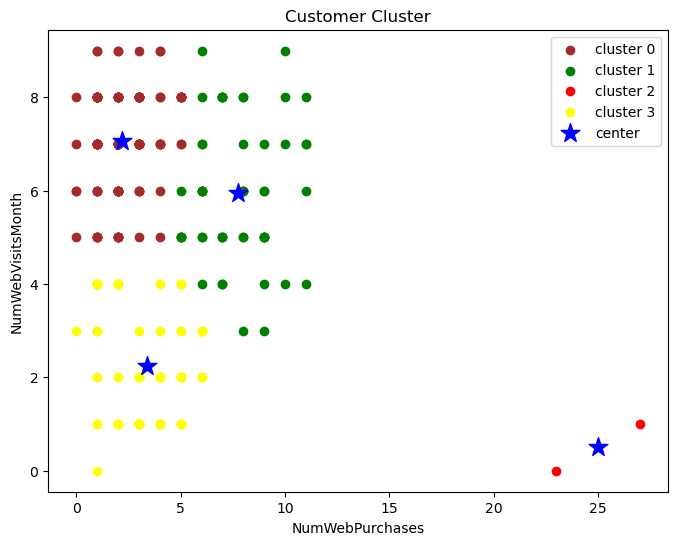

In [120]:
plt.figure(figsize= (8,6))
plt.scatter(X[pred==0,0],X[pred==0,1], c = 'brown',  label = 'cluster 0')
plt.scatter(X[pred==1,0],X[pred==1,1], c = 'green',  label = 'cluster 1')
plt.scatter(X[pred==2,0],X[pred==2,1], c = 'red',    label = 'cluster 2')
plt.scatter(X[pred==3,0],X[pred==3,1], c = 'yellow', label = 'cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s= 200 , marker='*' , c='blue', label= 'center')
plt.xlabel('NumWebPurchases')
plt.ylabel('NumWebVisitsMonth')
plt.title('Customer Cluster')
plt.legend()
plt.show()